In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from termcolor import colored
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.style as style
sns.set_theme(style="darkgrid")
style.use('seaborn-colorblind')

We have the following hashfunctions:

In [2]:
with open("./hashes.json", "r") as ifile:
    res = ifile.readlines()
    res = [json.loads(i) for i in res]
    results = {}
    for i in res:
        results[i["name"]] = i
print("available hashes to test:", results.keys())

available hashes to test: dict_keys(['naive_modulo'])


# functions you can use

In [3]:
def quick_analyze(name):
    '''
    input: hash name
    output: chi squared tests and avg hashing speed
    '''
    global results
    relevant = results[name]
    print(f"average hashing speed in ns, lower is better: {relevant['avg_time']}")
    
    print("chi squared according to wiki page, we want it to be between [0.95, 1.05]")
    ch2_wiki = ["chi_wiki_prime_iter", "chi_wiki_prime_rand", "chi_wiki_two_iter", "chi_wiki_two_rand"]
    for i in ch2_wiki:
        j = relevant[i]
        if j > 0.95 and j < 1.05:
            print(i, colored(j, "green"))
        else:
            print(i, colored(j, "red"))
            
    print("chi squared according to other source, we want it to be as close to 0 as possible")        
    print("I have marked those > 0.2 as bad, idk what a good cutoff value is")
    ch2_other = ["chi_other_prime_iter", "chi_other_prime_rand", "chi_other_two_iter","chi_other_two_rand" ]
    for i in ch2_other:
        j = relevant[i]
        if j < 0.2:
            print(i, colored(j, "green"))
        else:
            print(i, colored(j, "red"))



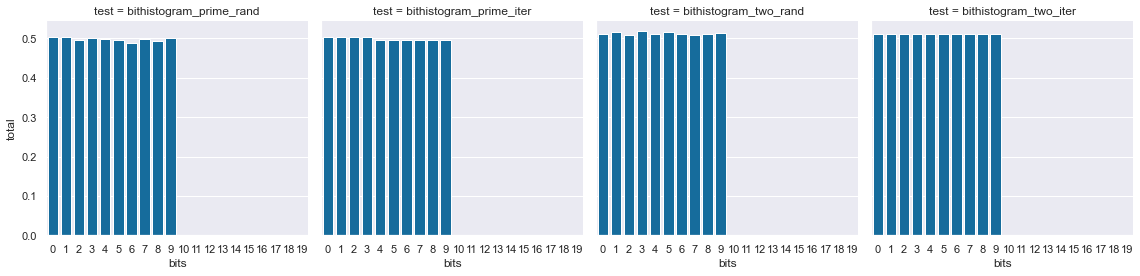

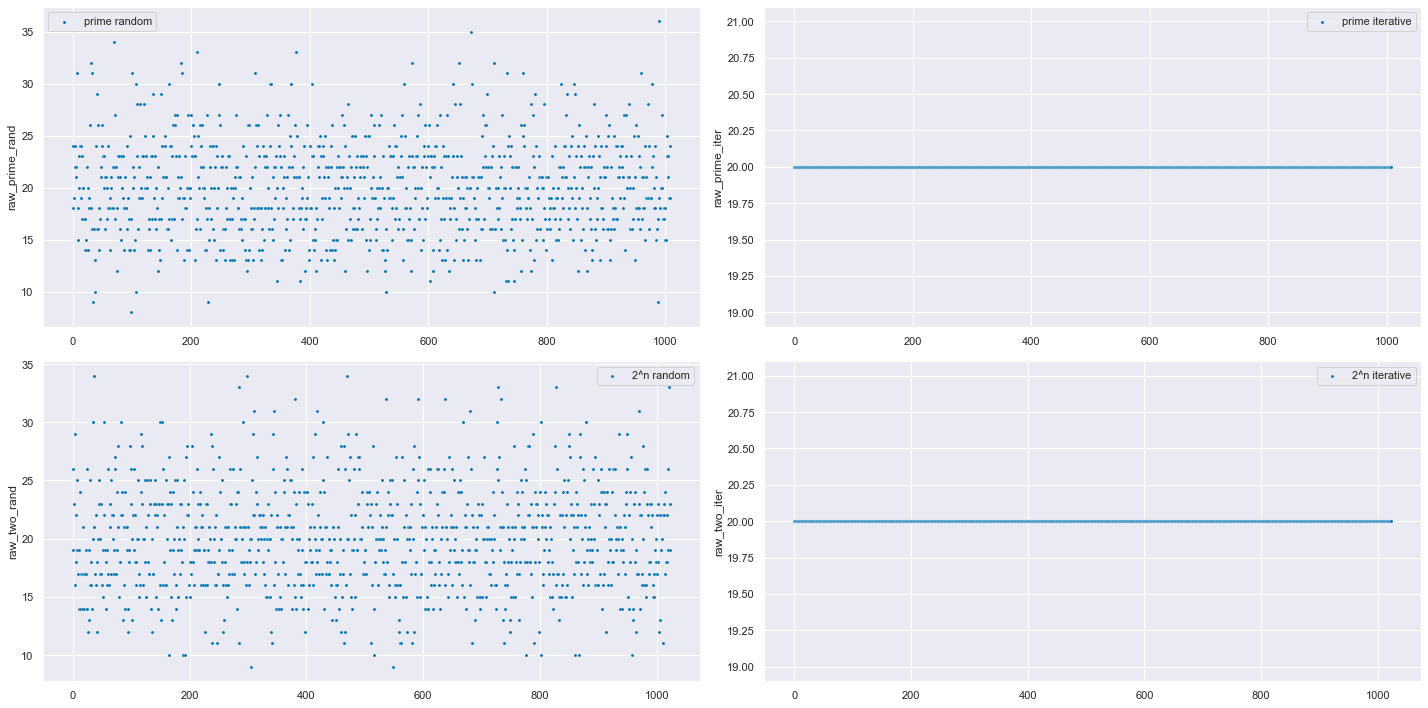

In [16]:
def plots(name):
    global results
    res = results[name]
    col_list = [
        "bithistogram_prime_rand",
    "bithistogram_prime_iter",
    "bithistogram_two_rand",
    "bithistogram_two_iter"]

    bitgram = pd.DataFrame(columns=["bits", "total","test"])
    for i in col_list:
        temp = np.array(res[i])
        temp = pd.DataFrame([range(0,32), temp/20000, [i for j in range(0,32)]])
        temp = temp.T
        temp.columns = bitgram.columns    
        bitgram = bitgram.append(temp)
    g = sns.FacetGrid(bitgram, col="test", height=4, aspect=1)
    g.map(sns.barplot, "bits", "total", order=range(0,20), label="test")
#     g.set(title="P(bit=1)")
#     print("DON't trust the results below")
#     bitgram["total"] = np.array([stats.binom_test(i*20000, 20000, 0.5) for i in bitgram["total"]])
#     h = sns.FacetGrid(bitgram, col="test", height=4, aspect=1)
#     h.map(sns.barplot, "bits", "total", order=range(0,20))
#     h.set(title="P(this is random)")

    cols = [
        "raw_prime_rand",
        "raw_prime_iter",
        "raw_two_rand",
        "raw_two_iter"
    ]
#     raw = pd.DataFrame(columns=["bucket", "total","test"])
#     for i in cols:
#         temp = np.array(res[i])
#         temp = pd.DataFrame([range(len(temp)), temp, [i for j in range(len(temp))]])
#         temp = temp.T
#         temp.columns = raw.columns 
#         raw = raw.append(temp)
#     i = sns.FacetGrid(raw, col="test", height=4, aspect=1)
#     i.map(sns.scatterplot, "bucket", "total", s=10)
    
    raw = pd.DataFrame( [
        res["raw_prime_rand"],
        res["raw_prime_iter"],
        res["raw_two_rand"],
        res["raw_two_iter"]
    ])
    raw = raw.T
    raw.columns=cols
    f, axs = plt.subplots(2, 2, figsize=(20 ,10), gridspec_kw=dict(width_ratios=[1,1]))
    sns.scatterplot(data=raw, x=np.arange(1024),  y="raw_prime_rand", ax=axs[0,0], s=10, label="prime random")
    sns.scatterplot(data=raw, x=np.arange(1024),  y="raw_prime_iter", ax=axs[0,1], s=10, label="prime iterative")
    sns.scatterplot(data=raw, x=np.arange(1024),  y="raw_two_rand", ax=axs[1,0], s=10, label="2^n random")
    sns.scatterplot(data=raw, x=np.arange(1024),  y="raw_two_iter", ax=axs[1,1], s=10, label="2^n iterative")
    f.tight_layout()
    


plots("naive_modulo")

In [5]:
print(results["naive_modulo"].keys())


dict_keys(['avg_time', 'bithistogram_prime_iter', 'bithistogram_prime_rand', 'bithistogram_two_iter', 'bithistogram_two_rand', 'chi_other_prime_iter', 'chi_other_prime_rand', 'chi_other_two_iter', 'chi_other_two_rand', 'chi_wiki_prime_iter', 'chi_wiki_prime_rand', 'chi_wiki_two_iter', 'chi_wiki_two_rand', 'name', 'raw_prime_iter', 'raw_prime_rand', 'raw_two_iter', 'raw_two_rand'])
